# Data Wrangling

## Gather

In [100]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#read csv
twitter_archive = pd.read_csv('twitter-archive-enhanced.txt')
twitter_archive_clean = twitter_archive.copy()

In [4]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
#get image predictions file from Udacity server and save to current directory
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response.content
file_type = url.split('/')[-1]

with open(file_type, "wb") as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t', header=0)
image_predictions_clean = image_predictions.copy()

In [6]:
#use Twitter API to get retweet and favorite counts for all tweets from WeRateDogs
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [7]:
tweet_ids = twitter_archive_clean.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json_copy.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [8]:
d = []

with open('tweet_json_copy.txt', 'r') as f:
    for line in f:
        tweets = json.loads(line)
        d.append(
            {
                'tweet_id': tweets['id'],
                'retweet_count': tweets['retweet_count'],
                'favorite_count': tweets['favorite_count']
            }
        )

In [9]:
len(d)

2354

In [10]:
json_info = pd.DataFrame(d, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
json_info_clean = json_info.copy()

In [11]:
json_info_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assess

In [12]:
#review for quality and tidiness issues
twitter_archive_clean.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327...,10,10,None,None,None,None,None
1182,718971898235854848,NaN,NaN,2016-04-10 01:20:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She is prepared for battle. 10/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718971898...,10,10,Sadie,None,None,None,None
1478,693590843962331137,NaN,NaN,2016-01-31 00:25:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Phil. He's big af. Currently destroying t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,None,None,pupper,None
267,841680585030541313,NaN,NaN,2017-03-14 16:01:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Penny. She's a dragon slayer. Feared b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841680585...,12,10,Penny,None,None,None,None
1536,689905486972461056,NaN,NaN,2016-01-20 20:21:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Gizmo. He's quite the pupper. Con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689905486...,11,10,Gizmo,None,None,pupper,None
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,3.638908e+08,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
1567,687826841265172480,NaN,NaN,2016-01-15 02:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's a rollercoaster of emotion...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687826841...,12,10,Louis,None,None,None,None
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
#see if any missing data in columns we'll need later
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#format so actual values show instead of exponential values
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#check if values make sense
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356,78,78,181,181,2356,2356
mean,742771590321719808,745507917855750656,20141706360873208,772039961038007040,12416983653017580,13,10
std,68567047444761032,75824920044192880,125279666255236320,62369278105055600,95992535331517536,46,7
min,666020888022790144,665814696700723200,11856342,666104133288665088,783214,0,0
25%,678398938214475776,675741911993464832,308637449,718631497683582976,4196983835,10,10
50%,719627934716235776,703870840226598912,4196983835,780465709297995776,4196983835,11,10
75%,799337304954252288,825780371286566912,4196983835,820314633777061888,4196983835,12,10
max,892420643555336192,886266357075128320,840547864354918400,887473957103951872,787461778435289088,1776,170


In [15]:
#check for duplicate rows
sum(twitter_archive_clean.duplicated())

0

In [16]:
#review for quality and tidiness issues
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1048,713411074226274305,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,Great_Pyrenees,1,True,Samoyed,0,True,kuvasz,0,True
1366,761672994376806400,https://pbs.twimg.com/ext_tw_video_thumb/76167...,1,gondola,0,False,sea_lion,0,False,pool_table,0,False
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0,False,indri,0,False,malamute,0,True
852,695816827381944320,https://pbs.twimg.com/media/CagJtjYW8AADoHu.jpg,1,Pomeranian,0,True,chow,0,True,sunglasses,0,False
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,1,True,Tibetan_mastiff,0,True,Labrador_retriever,0,True


In [17]:
#see if any missing data in columns we'll need later
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#format so actual values show instead of exponential values
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#check if values make sense
image_predictions_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.00,2075.00,2075.00,2075.00,2075.00
mean,738451357852539008.00,1.20,0.59,0.13,0.06
std,67852033330235656.00,0.56,0.27,0.10,0.05
min,666020888022790144.00,1.00,0.04,0.00,0.00
25%,676483507139540992.00,1.00,0.36,0.05,0.02
50%,711998809858043904.00,1.00,0.59,0.12,0.05
75%,793203448525178880.00,1.00,0.84,0.20,0.09
max,892420643555336192.00,4.00,1.00,0.49,0.27


In [19]:
#check for duplicate values
sum(image_predictions_clean.duplicated())

0

In [20]:
#review for quality and tidiness issues
json_info_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [21]:
#see if any missing data in columns we'll need later
json_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [22]:
json_info_clean.sample(5)

,tweet_id,retweet_count,favorite_count
2183,668986018524233728,183,578
1153,724983749226668032,1462,4040
1292,707995814724026368,1273,3385
99,872820683541237760,3884,15029
1484,693109034023534592,695,1889


In [23]:
#format so actual values show instead of exponential values
pd.set_option('display.float_format', lambda x: '%.0f' % x)

#check if values make sense
json_info_clean.describe()

,tweet_id,retweet_count,favorite_count
count,2354,2354,2354
mean,742697816435063552,3165,8081
std,68528120712910648,5285,11815
min,666020888022790144,0,0
25%,678397510244808704,624,1415
50%,719459571111233536,1474,3604
75%,799305849241918464,3652,10122
max,892420643555336192,79515,132810


In [24]:
#check for duplicate values
sum(json_info_clean.duplicated())

0

### Quality

##### Twitter Archive Table
- timestamp has +0000 at the end
- timestamp not datetime object 
- dog_stage not categorical object
- tweet_id, in_reply_to_status_id, in_reply_to_user_id not string object
- retweet_count, favorite count not integers
- retweets are included in the results
- retweeted_status_id and retweeted_status_user_id, retweeted_status_timestamp columns not needed after row deletion and 'doggo', 'floofer', 'pupper', 'puppo' columns aren't needed after moved into new column in tidiness section.
- one row with numerator of 960 and denominator 0


##### Images Table
- p1, p2, p3 names sometimes capitalized, sometimes not 
- p1, p2, p3 have underscores separating dog name values

### Tidiness

##### Twitter Archive Table
- doggo, floofer, pupper, puppo should be in one column, as they're values not variables

##### Images Table
- image table should be part of twitter_archive table 

##### JSON Table
- retweet_count and favorite_count should be part of twitter_archive table

## Clean

#### Images - doggo, floofer, pupper, puppo should be in one column, as they're values not variables

#### Define
create dog stage column with doggo, floofer, pupper, puppo as dog stage types, keeping only the dog stage value, if listed in one of the columns, or otherwise just listing None

#### Code

In [25]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

#### Test

In [26]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None


#### retweet_count and favorite_count should be part of twitter_archive table

#### Define

merge retweet_count and favorite_count from JSON Info table into Twitter Archive table using pandas merge function

#### Code

In [27]:
twitter_archive_clean = pd.merge(twitter_archive_clean, json_info_clean, on='tweet_id', how='left')

#### Test

In [28]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,nan,nan,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None,9774,41048


In [29]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     23

#### timestamp not datetime object

#### Define

Change timestamp column to datetime using pandas to_datetime function. 

#### Code

In [30]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage          

#### dog_stage not categorical object 

#### Define
Change datatype of dog_stage to categorical using astype

#### Code

In [32]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage          

#### tweet_id, in_reply_to_status_id, in_reply_to_user_id not string object

#### Define
Change datatype to string using astype

#### Code

In [34]:
#twitter_archive_clean[twitter_archive_clean.retweet_count.isna()]
twitter_archive_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']] = twitter_archive_clean[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id']].astype(str)

#### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage       

#### retweet_count, favorite_count not integers

#### Define
Change null values to zero, then change datatype to integer using astype

#### Code

In [42]:
twitter_archive_clean[['retweet_count', 'favorite_count']] = twitter_archive_clean[['retweet_count', 'favorite_count']].fillna(0)

In [43]:
twitter_archive_clean[['retweet_count', 'favorite_count']] = twitter_archive_clean[['retweet_count', 'favorite_count']].astype(int)

#### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage       

#### retweets are included in the results

#### Define

remove the rows from the dataframe that have values by using the Pandas isnull function

#### Code

In [45]:
twitter_archive_clean = twitter_archive_clean[pd.isnull(twitter_archive_clean['retweeted_status_id'])]

#### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         2175 non-null object
in_reply_to_user_id           2175 non-null object
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dog_stage             

#### retweeted_status_id and retweeted_status_user_id, retweeted_status_timestamp columns not needed after row deletion

#### Define

remove columns using drop function

#### Code

In [47]:
twitter_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [48]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048


#### timestamp has +0000 at the end

#### Define
Remove +0000 (which is for timezone) by using dt.tz_localize function

#### Code

In [49]:
twitter_archive_clean['timestamp'] = twitter_archive_clean['timestamp'].dt.tz_localize(None)

#### Test

In [50]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
1297,707776935007539200,nan,nan,2016-03-10 03:55:45,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She's a Bohemian Rhapsody. Rema...,https://twitter.com/dog_rates/status/707776935...,11,10,Sadie,None,1079,3593


#### one row with numerator of 960 and denominator 0

#### Define
Change these values to 13 and 10, as listed in the text column, using the replace function

#### Code

In [51]:
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].replace(960, 13)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].replace(0, 10)

#### Test

In [52]:
twitter_archive_clean.query('rating_numerator == 960')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count


In [53]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,42908
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,41048


#### p1, p2, p3 have underscores separating dog name values

#### Define
replace underscore with space using lambda expression and str.replace for each column

In [54]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0,True,collie,0,True,Shetland_sheepdog,0,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,1,True,miniature_pinscher,0,True,Rhodesian_ridgeback,0,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,1,True,malinois,0,True,bloodhound,0,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0,True,redbone,0,True,miniature_pinscher,0,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,1,True,Rottweiler,0,True,Doberman,0,True


#### Code

In [55]:
image_predictions_clean[['p1', 'p2', 'p3']] = image_predictions_clean[['p1', 'p2', 'p3']].apply(lambda x: x.str.replace('_', ' '))

#### Test

In [56]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0,True,collie,0,True,Shetland sheepdog,0,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,1,True,miniature pinscher,0,True,Rhodesian ridgeback,0,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,1,True,malinois,0,True,bloodhound,0,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0,True,redbone,0,True,miniature pinscher,0,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,1,True,Rottweiler,0,True,Doberman,0,True


#### p1, p2, p3 names sometimes capitalized, sometimes not 


#### Define
change first letter of all words in names using lambda expression and str.title for each column

#### Code

In [57]:
image_predictions_clean[['p1', 'p2', 'p3']] = image_predictions_clean[['p1', 'p2', 'p3']].apply(lambda x: x.str.title())

#### Test

In [58]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0,True,Collie,0,True,Shetland Sheepdog,0,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,1,True,Miniature Pinscher,0,True,Rhodesian Ridgeback,0,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,1,True,Malinois,0,True,Bloodhound,0,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0,True,Redbone,0,True,Miniature Pinscher,0,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,1,True,Rottweiler,0,True,Doberman,0,True


In [59]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### image table should be part of twitter_archive table

#### Define
change tweet_id in image_predictions to string and with astype adn merge Image Predictions table into Twitter Archive table using pandas merge function

#### Code

In [60]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions_clean, on='tweet_id', how='left')

#### Test

In [61]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,Orange,0,False,Bagel,0,False,Banana,0,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0,True,Pekinese,0,True,Papillon,0,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,1,True,Malamute,0,True,Kelpie,0,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,Paper Towel,0,False,Labrador Retriever,0,True,Spatula,0,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,Basset,1,True,English Springer,0,True,German Short-Haired Pointer,0,True


In [62]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null category
retweet_count            2175 non-null int32
favorite_count           2175 non-null int32
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf    

In [63]:
#storing clean dataframe as csv
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'twitter_archive_master.csv'

In [ ]:
##storing clean dataframe as txt also, because csv is placing zeros for last 3 digits of tweet_id
twitter_archive_clean.to_csv('twitter_archive_master.txt', index=False)

### Analysis and Visualization

In [65]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1888,671141549288370177,nan,nan,2015-11-30 01:39:49,"<a href=""http://twitter.com/download/iphone"" r...",Neat pup here. Enjoys lettuce. Long af ears. S...,https://twitter.com/dog_rates/status/671141549...,9,10,None,...,1,Guinea Pig,0,False,Wood Rabbit,0,False,Borzoi,0,True
1184,702932127499816960,nan,nan,2016-02-25 19:04:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's an Upper West Nile Pantaloo...,https://twitter.com/dog_rates/status/702932127...,6,10,Chip,...,1,Wallaby,0,False,Wombat,0,False,Beaver,0,False
2054,668204964695683073,nan,nan,2015-11-21 23:10:52,"<a href=""http://twitter.com/download/iphone"" r...",This is Ron. Ron's currently experiencing a br...,https://twitter.com/dog_rates/status/668204964...,8,10,Ron,...,1,Labrador Retriever,1,True,Golden Retriever,0,True,Chesapeake Bay Retriever,0,True
1223,699423671849451520,nan,nan,2016-02-16 02:42:52,"<a href=""http://twitter.com/download/iphone"" r...","""Don't ever talk to me or my son again."" ...bo...",https://twitter.com/dog_rates/status/699423671...,10,10,None,...,1,Pug,1,True,French Bulldog,0,True,Bull Mastiff,0,True
1497,682088079302213632,nan,nan,2015-12-30 06:37:25,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,https://vine.co/v/iqMjlxULzbn,12,10,None,...,nan,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN


#### Insight 1: Which types of dogs receive the highest favorites count?

Since the dog types in columns p1, p2, and p3 were identified by a neural network, they're not all accurate, and sometimes don't return a real dog type. If we only group by p1 (the first guess by the neural network), many of the top results are not actually dog types, but if we group by both p1 and p2(the second guess by the neural network), we mostly get dog types and the associated average favorite counts where p1 and p2 return these same two types. We then sort the results by the average favorite count.

In [104]:
#formatting data so confidence values show correctly
pd.options.display.float_format = "{:.2f}".format
dog_type_favorites = twitter_archive_clean.groupby(['p1', 'p2'], as_index=False)['favorite_count', 'p1_conf', 'p2_conf'].mean()
dog_type_favorites_sort = dog_type_favorites.sort_values('favorite_count', ascending=False).head(20)
dog_type_favorites_sort

,p1,p2,favorite_count,p1_conf,p2_conf
640,Lakeland Terrier,Labrador Retriever,132810.00,0.20,0.16
387,English Springer,Boston Bull,107956.00,0.38,0.13
1052,Standard Poodle,Toy Poodle,95450.00,0.35,0.27
29,Arabian Camel,House Finch,75639.00,0.37,0.21
25,Angora,Malamute,75193.00,0.22,0.22
180,Bubble,Leafhopper,67100.00,1.00,0.00
624,Labrador Retriever,Ice Bear,66105.50,0.65,0.13
1070,Swing,Bedlington Terrier,61794.00,0.93,0.02
161,Boxer,Dalmatian,58302.00,0.31,0.24
848,Pomeranian,Eskimo Dog,56848.00,0.57,0.18


We can see that tweets with pictures of dogs that are may be Lakeland Terriers or Labrador Retrievers get the most favorites, on average, followied by English Springer/Boston Bull, and then poodles. However, the neural network doesn't have a lot of confidence that it's guesses are correct, with only a 20% confidence that the #1 favorite is a Lakeland Terrier or 16% chance that it's a Labradore Retriever. 

Below we look at the average confidence of the neural network's #1 predictions listed above, grouped by the number #1 prediction values, to see how confident the algorithm is at identifying dogs. 

Text(0, 0.5, 'Confidence Avg')

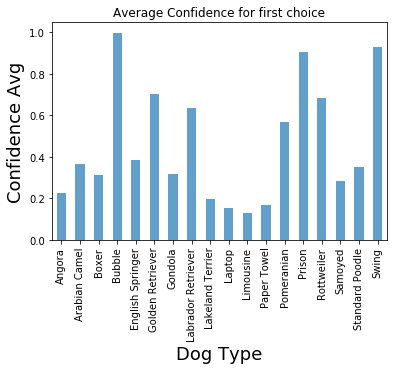

In [125]:
p1_confidence_avg = dog_type_favorites_sort.groupby('p1').p1_conf.mean()
p1_confidence_avg.plot(kind='bar', title='Average Confidence for first choice', alpha=.7)
plt.xlabel('Dog Type', fontsize=18)
plt.ylabel('Confidence Avg', fontsize=18)

From the chart we can see that the neural network algorithm is most confident when it's guesses are something other than a dog. So it may be finding other images in the pictures instead of the dog, and showing the more confidence that those items are in the picture, rather than a dog. The dogs it does have the most confidence in predicting, on average, are Rottweiler, Pomeranian, Labrador Retriever, and Golden Retriever.

#### Insight 2: Which types of dogs receive the highest rating?

Here we want to see which type of dog from the first prediction of the Neural Network get the highest average ratings from the WeRateDogs twitter account.

In [124]:
#first get only dogs
dog_type_true = twitter_archive_clean.query('p1_dog == True')
#['favorite_count', 'p1_conf', 'p2_conf'].mean()
dog_rating_avg = dog_type_true.groupby('p1', as_index=False)['rating_numerator'].mean()
dog_rating_avg.sort_values('rating_numerator', ascending=False).head(10)

,p1,rating_numerator
28,Clumber,27.00
94,Soft-Coated Wheaten Terrier,25.45
107,West Highland White Terrier,15.64
47,Great Pyrenees,14.93
16,Borzoi,14.44
60,Labrador Retriever,13.91
92,Siberian Husky,13.25
44,Golden Retriever,13.21
79,Pomeranian,12.87
85,Saluki,12.50


On average Clumber Spaniels and Soft_coated Wheaten Terrier get the highest ratings by far. While this seems pretty convincing, we could dig deeper into the data and see if there are any outliers that are pushing their numbers so high.

In [120]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null category
retweet_count            2175 non-null int32
favorite_count           2175 non-null int32
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994 non-null object
p2_conf    

#### Insight 3: Which dog stage gets the most retweets?



Text(0, 0.5, 'Retweet Count Average')

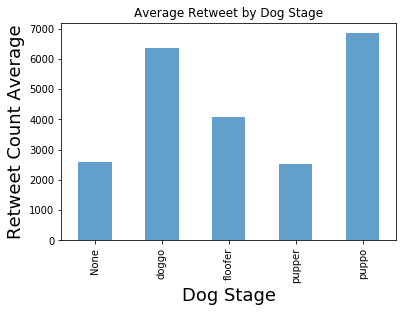

In [131]:
dog_stage_retweet_avg = twitter_archive_clean.groupby('dog_stage')['retweet_count'].mean()
dog_stage_retweet_avg.plot(kind='bar', title='Average Retweet by Dog Stage', alpha=.7)
plt.xlabel('Dog Stage', fontsize=18)
plt.ylabel('Retweet Count Average', fontsize=18)

In [130]:
twitter_archive_clean.query('dog_stage == "pupper"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
28,886366144734445568,nan,nan,2017-07-15 23:25:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,...,1.00,French Bulldog,1.00,True,Chihuahua,0.00,True,Boston Bull,0.00,True
46,882762694511734784,nan,nan,2017-07-06 00:46:41,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,...,1.00,Labrador Retriever,0.85,True,Chesapeake Bay Retriever,0.07,True,Flat-Coated Retriever,0.02,True
53,881536004380872706,nan,nan,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,...,1.00,Samoyed,0.28,True,Angora,0.27,False,Persian Cat,0.11,False
75,876838120628539392,nan,nan,2017-06-19 16:24:33,"<a href=""http://twitter.com/download/iphone"" r...",This is Ginger. She's having a ruff Monday. To...,https://twitter.com/dog_rates/status/876838120...,12,10,Ginger,...,1.00,Bloodhound,0.58,True,Redbone,0.24,True,Tibetan Mastiff,0.09,True
84,874296783580663808,nan,nan,2017-06-12 16:06:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Jed. He may be the fanciest pupper in ...,https://twitter.com/dog_rates/status/874296783...,13,10,Jed,...,1.00,Cocker Spaniel,0.44,True,Miniature Poodle,0.28,True,Toy Poodle,0.16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,672594978741354496,nan,nan,2015-12-04 01:55:13,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,...,1.00,Great Pyrenees,0.76,True,Old English Sheepdog,0.08,True,Afghan Hound,0.03,True
1823,672481316919734272,nan,nan,2015-12-03 18:23:34,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,...,1.00,Border Collie,0.60,True,Collie,0.11,True,Shetland Sheepdog,0.09,True
1830,672254177670729728,nan,nan,2015-12-03 03:21:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,...,1.00,Pug,0.98,True,French Bulldog,0.02,True,Norwegian Elkhound,0.00,True
1836,672205392827572224,nan,nan,2015-12-03 00:07:09,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,...,1.00,Carton,0.95,False,Crate,0.04,False,Pug,0.00,True


used to format data
https://stackoverflow.com/questions/55394854/how-to-change-the-format-of-describe-output

used to remove non null values
https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/

used to remove timezone from datetime object
https://stackoverflow.com/questions/49198068/how-to-remove-timezone-from-a-timestamp-column-in-a-pandas-dataframe?noredirect=1&lq=1